# Plotting

First, let's train up a simple network to explore. This one is trained to compute XOR:

In [1]:
from conx import Network, Layer, SGD

net = Network("XOR Network", 2, 4, 1, activation="sigmoid")
dataset = [
    ([0, 0], [0]),
    ([0, 1], [1]),
    ([1, 0], [1]),
    ([1, 1], [0])
]
net.set_dataset(dataset)
net.compile(loss='mean_squared_error',
            optimizer=SGD(lr=0.3, momentum=0.9))
net.train(epochs=2000, accuracy=1.0, report_rate=25)

Using Theano backend.


Training...
Epoch #   25 | train error 0.25070 | train accuracy 0.50000 | validate% 0.00000
Epoch #   50 | train error 0.25007 | train accuracy 0.75000 | validate% 0.00000
Epoch #   75 | train error 0.25000 | train accuracy 0.50000 | validate% 0.00000
Epoch #  100 | train error 0.24995 | train accuracy 0.50000 | validate% 0.00000
Epoch #  125 | train error 0.24989 | train accuracy 0.50000 | validate% 0.00000
Epoch #  150 | train error 0.24982 | train accuracy 0.25000 | validate% 0.00000
Epoch #  175 | train error 0.24971 | train accuracy 0.75000 | validate% 0.00000
Epoch #  200 | train error 0.24952 | train accuracy 0.50000 | validate% 0.00000
Epoch #  225 | train error 0.24916 | train accuracy 0.50000 | validate% 0.00000
Epoch #  250 | train error 0.24842 | train accuracy 0.50000 | validate% 0.00000
Epoch #  275 | train error 0.24668 | train accuracy 0.50000 | validate% 0.00000
Epoch #  300 | train error 0.24245 | train accuracy 0.50000 | validate% 0.00000
Epoch #  325 | train error 0

## Propagate to plot

This plotting function allows us to see the activation at a specific unit, given that we vary two inputs.

You must specify which output or hidden layer unit to plot, the name of the input bank, and the two units.

In this example, we explore the output unit given that we vary the two inputs:

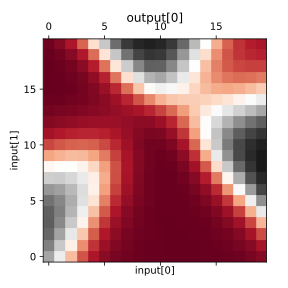

In [9]:
net.propagate_to_plot(output_layer="output", output_index=0, 
                      input_layer="input", input_index1=0, input_index2=1)

How does the network actually solve the problem? We can look at the intermediary values at the hidden layer by plotting each of the 4 hidden units in this manner:

In [10]:
from IPython.display import display

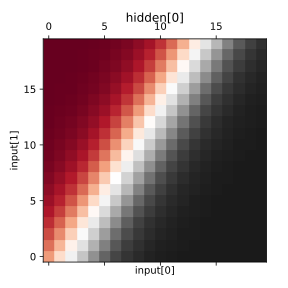

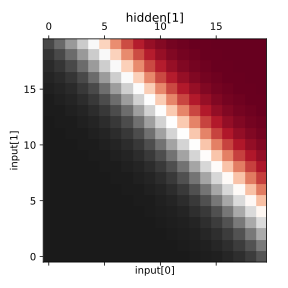

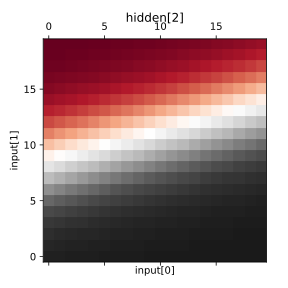

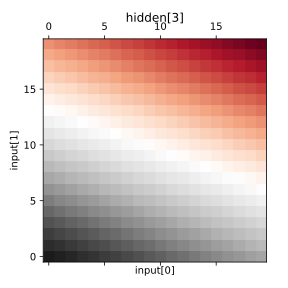

In [11]:
for i in range (4):
    display(net.propagate_to_plot(output_layer="hidden", output_index=i, 
                                  input_layer="input", input_index1=0, input_index2=1))

## Plotting error, accuracy, and validation test percent

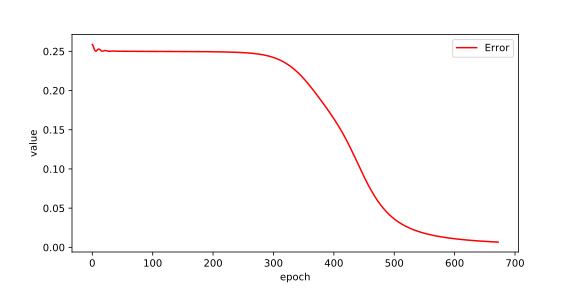

In [6]:
net.plot("error")

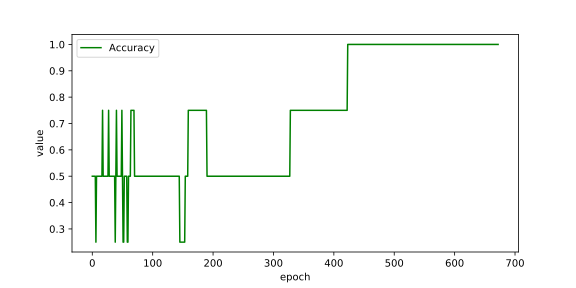

In [7]:
net.plot("accuracy")

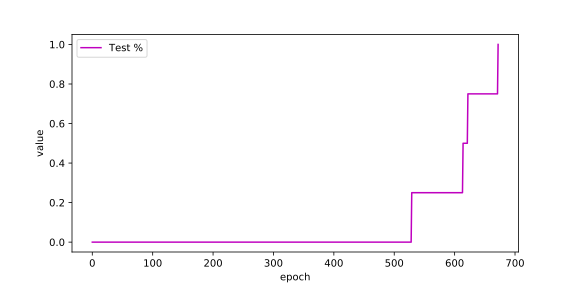

In [8]:
net.plot("test")

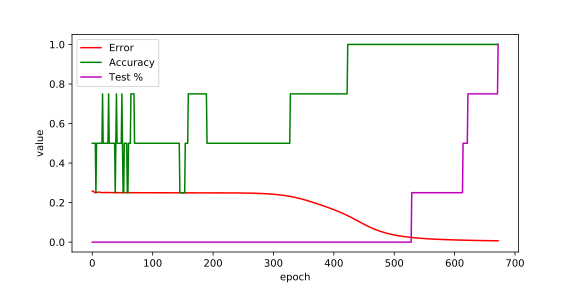

In [5]:
net.plot("error", "accuracy", "test")